In [68]:
import xarray as xr                                   # for working with gridded netcdf data
import regionmask, geopandas as gpd                   # for working with shapefiles
import matplotlib.pyplot as plt, cartopy              # plotting functions

# Working with shapefiles

We can use shapefiles to mask out or select different areas of gridded datasets.  
The `regionmask` package provides some pre-loaded shapefiles from Natural Earth but you can also load your own using `geopandas`

Examples of some common operations are given below.



In [69]:
# first, load your gridded data and select the variable of interest
da = xr.open_dataset("era5_t2m_daily_af_34-42E_-5-5N_-999-lastyear_su.nc").t2m

## Masking out the sea using `regionmask`

Regionmask's land-sea mask comes in three resolutions: 10m, 50m and 110m. You can choose how much detail you need.

In [70]:
# create the land-sea mask based on the coordinates of the gridded dataset and the boundaries from the shapefile
lsm = regionmask.defined_regions.natural_earth_v5_0_0.land_50.mask(da)

# mask out the gridded data only where the land-sea mask has a zero value
da = da.where(lsm == 0, drop = True)

/tmp/ipykernel_14211/2476719248.py:2: UserWarning: `land_50` of `natural_earth_v4_1_0` and `natural_earth_v5_0_0` does not quite extend to 90°S - it's recommended to use `natural_earth_v5_1_2` instead. See https://github.com/regionmask/regionmask/issues/487
  lsm = regionmask.defined_regions.natural_earth_v5_0_0.land_50.mask(da)


/home/cb2714/conda/envs/wwa/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


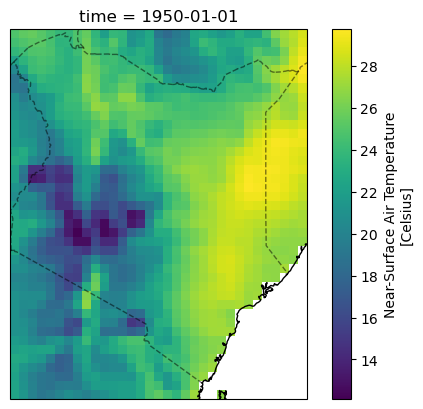

In [4]:
# run a quick plot to check that this work
da.isel(time = 0).plot(subplot_kws = {"projection" : cartopy.crs.PlateCarree()})
ax = plt.gca()
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, color = "k", alpha = 0.5, ls = "--")

## Selecting a country or countries using `regionmask`



### Create a mask

In [2]:
# create a regionmask of the countries in the data
countries = regionmask.defined_regions.natural_earth_v5_0_0.countries_110.mask(da)

# get the ID for the countries we're interested in (you may have to experiment to get the right countries)
country_index = regionmask.defined_regions.natural_earth_v5_0_0.countries_110.map_keys(["KE", "ET"])

NameError: name 'da' is not defined

In [34]:
# filter the gridded data to select only the countries you're interested in
da_masked = da.where(countries.isin(country_index), drop = True)

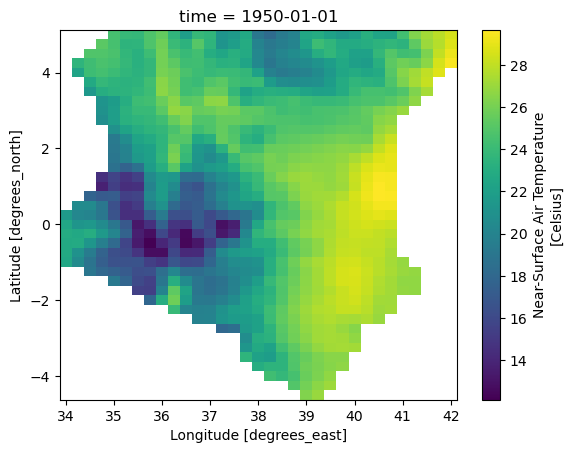

In [35]:
da_masked.isel(time = 0).plot()

### Create a shapefile

In [63]:
# create a regionmask of the countries in the data
countries = regionmask.defined_regions.natural_earth_v5_0_0.countries_50.to_geodataframe()

In [64]:
# select just the countries we're interested in (you may have to experiment to get the right countries)
countries = countries.loc[countries.abbrevs.isin(["IRL", "GB"])]

# clip to just the region we want (excludes most of UK)
countries = countries.clip((-11,-51,-5,56))

In [ ]:
# we have a shapefile - but there are lots of annoying extra bits and the main region has a border through it. We need to extract just the largest contiguous area.
countries.plot()

In [ ]:
# first, stick all the polygons together and then break them up into separate pieces
countries = countries.dissolve().explode()

# now we can select the largest single polygon
countries = countries.loc[countries.geometry.area == countries.geometry.area.max()]

# save it to file
countries.to_file("sf_studyregion")

# and a quick plot to check it looks ok
countries.boundary.plot()

## Loading and plotting a shapefile

You might want to download a shapefile of your own and use that to select a region. For example:

  - River catchments in Africa: https://data.hydrosheds.org/file/HydroBASINS/standard/hybas_af_lev01-06_v1c.zip  
    You can download other catchment data from https://www.hydrosheds.org/products/hydrobasins

  - counties in Kenya: https://www.open.africa/dataset/kenya-counties-shapefile

Download the data and unzip if necessary, then copy **all** the files into their own directory. In the example below I've saved the files in the directory `sf_counties`.

In [ ]:
# load the shapefile and check the contents
sf = gpd.read_file("sf_counties")
sf

,OBJECTID,AREA,PERIMETER,COUNTY3_,COUNTY3_ID,COUNTY,Shape_Leng,Shape_Area,geometry
0,1,5.677,15.047,2.0,1.0,Turkana,15.046838,5.676985,"POLYGON ((35.79593 5.34449, 35.79659 5.34468, ..."
1,2,6.177,11.974,3.0,2.0,Marsabit,11.974165,6.176831,"POLYGON ((36.05061 4.45622, 36.23184 4.45124, ..."
2,3,2.117,7.355,4.0,3.0,Mandera,7.355154,2.117196,"POLYGON ((41.62133 3.97673, 41.62272 3.9786, 4..."
3,4,4.610,9.838,5.0,4.0,Wajir,9.838408,4.609589,"POLYGON ((39.31812 3.47197, 39.31956 3.47168, ..."
4,5,0.740,5.030,6.0,5.0,West Pokot,5.030271,0.740481,"POLYGON ((35.12745 2.62271, 35.12762 2.62302, ..."
5,6,1.713,8.311,7.0,6.0,Samburu,8.311013,1.713014,"POLYGON ((36.73652 2.51379, 36.73706 2.51398, ..."
6,7,2.060,10.181,8.0,7.0,Isiolo,10.181411,2.059820,"POLYGON ((37.94529 1.26288, 38.33966 1.57742, ..."
7,8,0.877,5.964,9.0,8.0,Baringo,5.964266,0.877177,"POLYGON ((35.70707 1.4216, 35.70693 1.42253, 3..."
8,9,0.245,4.064,10.0,9.0,Keiyo-Marakwet,4.063527,0.245208,"POLYGON ((35.7028 1.24649, 35.70271 1.24591, 3..."
9,10,0.202,2.387,11.0,10.0,Trans Nzoia,2.387265,0.201983,"POLYGON ((34.82016 1.25983, 34.82024 1.26042, ..."


<Axes: >

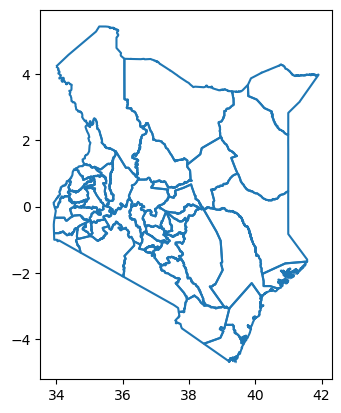

In [5]:
# plot the outlines of the regions you're interested in
sf.boundary.plot()

<Axes: >

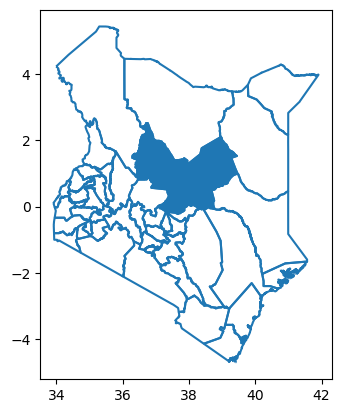

In [6]:
# plot the outlines of the regions you're interested in
sf.boundary.plot()
sf.loc[sf.COUNTY.isin(["Isiolo", "Meru", "Samburu"])].plot(ax = plt.gca())

<Axes: >

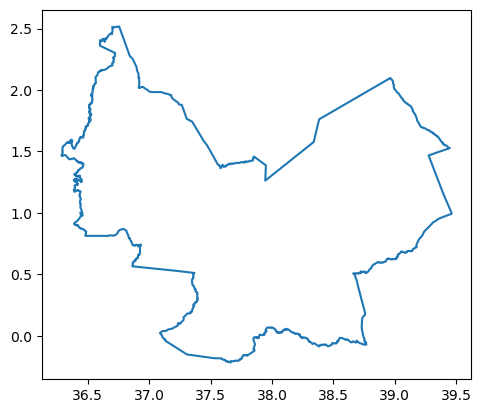

In [7]:
# create a new shapefile combining the regions you're actually interested in and merge into a single shapefile
sf_studyregion = sf.loc[sf.COUNTY.isin(["Isiolo", "Meru", "Samburu"])].dissolve()
sf_studyregion.boundary.plot()


In [8]:
sf_studyregion.to_file("sf_studyregion") # this will throw an error if you try to overwrite the directory

IsADirectoryError: [Errno 21] Is a directory: 'sf_studyregion'

In [10]:
rm = regionmask.mask_geopandas(sf_studyregion, da)

In [ ]:
rm.plot()

In [17]:
ts = da.where(rm == 0, drop = True).mean(["lat", "lon"])

In [18]:
ts.to_netcdf("ts-daily_era5_tmax.nc")